In [0]:
from sklearn.datasets import fetch_openml

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [0]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [0]:
X,y = mnist["data"], mnist["target"]

In [6]:
X.shape

(70000, 784)

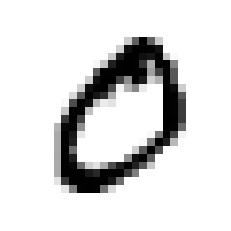

In [16]:
some_digit = X[1]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [17]:
y[1]

0

In [0]:
y = y.astype(np.uint8)

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [0]:
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

In [19]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
sgd_clf.predict([some_digit])

array([ True])

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.9854, 0.9847, 0.9865])

In [0]:
from sklearn.base import BaseEstimator
class Never0Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X),1), dtype=bool)

In [24]:
never_0_clf = Never0Classifier()
cross_val_score(never_0_clf, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.9003 , 0.9035 , 0.90005])

In [0]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3)

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_0, y_train_pred)

array([[53486,   591],
       [  277,  5646]])

In [28]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_0, y_train_pred)
# = 5646 / ( 5646 + 591)

0.9052429052429053

In [29]:
recall_score(y_train_0, y_train_pred)
# = 5646 / ( 5646 + 277)

0.9532331588721932

In [30]:
from sklearn.metrics import f1_score
f1_score(y_train_0, y_train_pred)
# = 5646 / ( 5646 + ((591+277)/2))

0.9286184210526315

In [31]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores
# seuil de décision de la prédiction de some_digit

array([21180.55082734])

In [36]:
threshold = 0 #seuil à 0 => donc sera True car le seuil de décision est de 21180
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [37]:
threshold = 22000 #seuil à 22000 => donc sera False car le seuil de décision est de 21180
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [0]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3, method = "decision_function") #utilisation de la méthode decision function pour obtenir les scores de décisions utilisés plutot que les prédictions

In [0]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_0,y_scores)

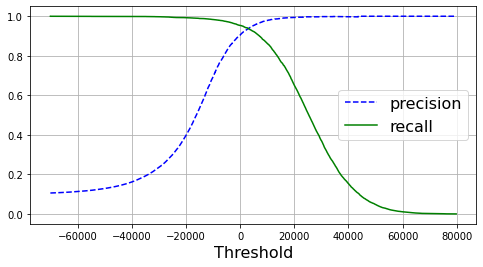

In [51]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds,precisions[:-1],'b--', label = "precision")
  plt.plot(thresholds, recalls[:-1], "g-", label= "recall")
  plt.legend(loc="center right", fontsize=16)
  plt.xlabel("Threshold", fontsize=16)
  plt.grid(True)
  # plt.axis([-50000, 50000, 0, 1])



plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()


In [0]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]



In [0]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [54]:
precision_score(y_train_0,y_train_pred_90)

0.9000636537237429

In [55]:
recall_score(y_train_0,y_train_pred_90)

0.9549214924869154

In [0]:
##ROC AUC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

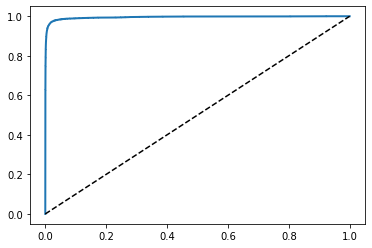

In [57]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--') # diagonale

plot_roc_curve(fpr,tpr)
plt.show()

In [58]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_0, y_scores)

0.9951089652363219

In [0]:
## Let's try something else
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3, method = "predict_proba")

In [0]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_0, y_scores_forest)

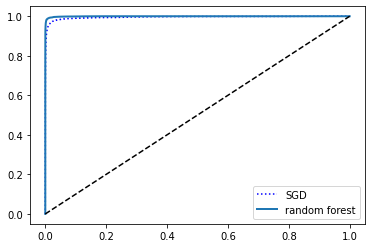

In [64]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"random forest")
plt.legend(loc="lower right")
plt.show()

In [65]:
roc_auc_score(y_train_0,y_scores_forest)

0.9994553136100529